# <div style="font-family: Trebuchet MS; background-color: #58D68D; color: #000000; padding: 12px; line-height: 1.5; font-size:"> Introduction 🎻</div>

### <div style="font-family: Trebuchet MS; background-color: #F4D03F; color: #000000; padding: 12px; line-height: 1.5;"> Hey Kagglers!! Today I am gonna share with you a simple tool that you can leverage to speeden up the big data processing involved in your own projects. For freshers/experienced practioners, I believe that it is important for y'all to get a basic understanding of the Spark ecosystem as many data-centric companies are continuing to adopt this technology.<br><br> In this notebook, I have tried to compile all the basic functionalities to get you started with Spark effortlessly.</div>

<div style="font-family: Trebuchet MS; background-color: #EAECEE; color: #000000; padding: 12px; line-height: 1;"><h3> Some basic guidelines that I have followed to make this notebook look interactive:</h3><h4><ul style=“list-style-type:square”><li>Whenever there is a definition, I have highlighted it with a  <span style="background-color: #2E31FD;font-size: 25px">📣</span></li><br><li>Whenever there is a new function/method, I have highlighted it with a <span style="background-color: #00FF00;font-size: 25px">🌼</span></li><br><li>Whenever there is a suggestion from my side, I have highlighted it with a <span style="background-color: #F3FF00;font-size: 25px">📌</span></li></ul></h4></div> 

### So what are you waiting for! Let's get started with the basics:

## <div style="padding: 12px"><span style="background-color: #2E31FD;font-size: 35px">📣</span> What is Apache Spark in Technical terms.</div>

- Apache Spark is an open-source, distributed data processing and analytics framework designed for large-scale data processing tasks. 

- It provides a unified and flexible platform for performing various data processing operations, including batch processing, interactive queries, real-time stream processing, machine learning, and graph processing.

## <div style="padding: 12px"><span style="background-color: #2E31FD;font-size: 35px">📣</span> What is this Apache Spark with a simple analogy? </div>

- Apache Spark is like a supercharged engine for processing and analyzing really big piles of data. Imagine you have a massive amount of information, like a gigantic puzzle with millions of pieces. Trying to solve this puzzle on a single computer could take forever. But Spark lets you use many computers at once, like a team of puzzle solvers, to work on different parts of the puzzle together.

- These "puzzle solvers" (computers) can talk to each other and share their findings, making the work faster and more efficient. Spark also keeps everything organized and makes sure that even if one of the "puzzle solvers" takes a break or has a problem, the others can still continue working without losing progress.

- In simple words, Apache Spark helps you process huge amounts of data much faster by getting a bunch of computers to work together and collaborate on the job. It's like a team effort that makes solving big data problems much easier and quicker!

## <div style="padding: 12px"><span style="background-color: #2E31FD;font-size: 35px">📣</span> What is PySpark?</div>

- PySpark is the Python API to use Spark, just like Pandas.

- In simple words, PySpark is a special tool that combines the power of many computers with the simplicity of Python to help you handle really big piles of data without breaking a sweat!

## <div style="padding: 12px"><span style="background-color: #2E31FD;font-size: 35px">📣</span> Benefits of using PySpark over Pandas for Data Processing:</div>

#### 1. Scalability and Distributed Computing:

- PySpark is designed for processing large-scale data across clusters of machines. It can handle data sizes that may not fit in memory, as it utilizes distributed computing.
- Pandas, on the other hand, is designed for single-machine data processing and may struggle with extremely large datasets that exceed available memory.

#### 2. Performance:

- PySpark's in-memory processing and distributed computing can lead to better performance for certain operations on large datasets compared to pandas.
- While pandas is fast for single-machine operations, PySpark's parallel processing can provide significant performance gains for operations that can be parallelized across multiple nodes.

# <div style="font-family: Trebuchet MS; background-color: #B0E0E6; color: #000000; padding: 12px; line-height: 1.5;"> Importing Libraries 📚</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import regex as re
import os
from IPython.display import Image,display

## Supressing warnings:
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285413 sha256=4449e581ed06c947e63c63c149a1d97fc3fb634c8c37f5ffc03e6b012df00944
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [159]:
## importing essential spark libraries:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, split, count, when, regexp_replace, udf, struct, lit, isnull, trim, asc, desc, round
from pyspark.sql.functions import to_timestamp, to_date, unix_timestamp, date_format   ### --> Date manipulation
from pyspark.sql.types import StructField, StructType, StringType, IntegerType, FloatType

# <div style="font-family: Trebuchet MS; background-color: #B0E0E6; color: #000000; padding: 12px; line-height: 1.5;"> Getting Started with the Analysis 🔬</div>


#### The first step towards your adventure in Spark is to create a Spark Session. It is the entry point to the Spark ecosystem. Once you<br><br>reach the Spark environment via the entry point, you can freely create and manipulate Spark RDDs, Dataframes and Datasets. 

## <span style="background-color: #2E31FD;font-size: 35px">📣</span> What is a RDD?

You might be wondering what this new term is. Well RDD stands for **Resilient Distributed Dataset**. It is the fundamental data structure of Spark.

### <span style="background-color: #00FF00;font-size: 35px">🌼</span> SparkSession.builder()

#### SparkSession will be created using SparkSession.builder() builder patterns::

In [4]:
##  Creating a Spark session:
spark = SparkSession.builder.appName('Sample').getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/09/07 19:42:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
## Quick glance at the object
spark

##### Here, the spark object acts as the gateway to the Spark ecosystem. 

### <span style="background-color: #00FF00;font-size: 35px">🌼</span> read.csv(), show()

To read a csv file.

In [6]:
df=spark.read.csv("/kaggle/input/food-delivery-dataset/train.csv",
                  header=True,
                  inferSchema=True)
#  Parameters:
## - inferSchema parameter ensures that the data formatting stays the same as the original dataframe. If False, then the 
##     columns will be of class string.
## - header parameter tells that the columns names are provided along with the dataset.

## Displaying the first 5 rows:
df.show(5)

+-------+------------------+-------------------+-----------------------+-------------------+--------------------+--------------------------+---------------------------+----------+-----------+-------------------+--------------------+--------------------+-----------------+-------------+---------------+-------------------+--------+--------------+---------------+
|     ID|Delivery_person_ID|Delivery_person_Age|Delivery_person_Ratings|Restaurant_latitude|Restaurant_longitude|Delivery_location_latitude|Delivery_location_longitude|Order_Date|Time_Orderd|  Time_Order_picked|   Weatherconditions|Road_traffic_density|Vehicle_condition|Type_of_order|Type_of_vehicle|multiple_deliveries|Festival|          City|Time_taken(min)|
+-------+------------------+-------------------+-----------------------+-------------------+--------------------+--------------------------+---------------------------+----------+-----------+-------------------+--------------------+--------------------+-----------------+-----

### <span style="background-color: #00FF00;font-size: 35px">🌼</span> toPandas(), head()

To view the dataframe in the form of Pandas dataframe fashion.

In [7]:
## To convert a spark dataframe into a pandas dataframe
df.toPandas().head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,2023-09-07 11:45:00,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,2023-09-07 19:50:00,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,2023-09-07 08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,2023-09-07 18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,2023-09-07 13:45:00,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,(min) 30


#### As you can see above, Time_taken(min) is the target variable.

#### Now we have read the csv file into Spark. Lets view the dataframe:

In [8]:
## Viewing the type
type(df)

pyspark.sql.dataframe.DataFrame

### <span style="background-color: #00FF00;font-size: 35px">🌼</span> printSchema()

To print the schema of the dataset.

In [9]:
## Printing the attributes of the table:
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Delivery_person_ID: string (nullable = true)
 |-- Delivery_person_Age: double (nullable = true)
 |-- Delivery_person_Ratings: double (nullable = true)
 |-- Restaurant_latitude: double (nullable = true)
 |-- Restaurant_longitude: double (nullable = true)
 |-- Delivery_location_latitude: double (nullable = true)
 |-- Delivery_location_longitude: double (nullable = true)
 |-- Order_Date: string (nullable = true)
 |-- Time_Orderd: string (nullable = true)
 |-- Time_Order_picked: timestamp (nullable = true)
 |-- Weatherconditions: string (nullable = true)
 |-- Road_traffic_density: string (nullable = true)
 |-- Vehicle_condition: integer (nullable = true)
 |-- Type_of_order: string (nullable = true)
 |-- Type_of_vehicle: string (nullable = true)
 |-- multiple_deliveries: double (nullable = true)
 |-- Festival: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Time_taken(min): string (nullable = true)



In [10]:
## Displaying the first 5 rows in the form of col-value pairs
df.head(5)

[Row(ID='0x4607 ', Delivery_person_ID='INDORES13DEL02 ', Delivery_person_Age=37.0, Delivery_person_Ratings=4.9, Restaurant_latitude=22.745049, Restaurant_longitude=75.892471, Delivery_location_latitude=22.765049, Delivery_location_longitude=75.912471, Order_Date='19-03-2022', Time_Orderd='11:30:00', Time_Order_picked=datetime.datetime(2023, 9, 7, 11, 45), Weatherconditions='conditions Sunny', Road_traffic_density='High ', Vehicle_condition=2, Type_of_order='Snack ', Type_of_vehicle='motorcycle ', multiple_deliveries=0.0, Festival='No ', City='Urban ', Time_taken(min)='(min) 24'),
 Row(ID='0xb379 ', Delivery_person_ID='BANGRES18DEL02 ', Delivery_person_Age=34.0, Delivery_person_Ratings=4.5, Restaurant_latitude=12.913041, Restaurant_longitude=77.683237, Delivery_location_latitude=13.043041, Delivery_location_longitude=77.813237, Order_Date='25-03-2022', Time_Orderd='19:45:00', Time_Order_picked=datetime.datetime(2023, 9, 7, 19, 50), Weatherconditions='conditions Stormy', Road_traffic_den

### <span style="background-color: #00FF00;font-size: 35px">🌼</span> describe(), summary()

To view the basic statistics of the dataset.

In [11]:
## Basic statistics of the data:
df.describe()    ### df.summary()
df.describe().show()

23/09/07 19:42:31 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+-------+------------------+-------------------+-----------------------+-------------------+--------------------+--------------------------+---------------------------+----------+-----------+-----------------+--------------------+------------------+-------------+---------------+-------------------+--------+--------------+---------------+
|summary|     ID|Delivery_person_ID|Delivery_person_Age|Delivery_person_Ratings|Restaurant_latitude|Restaurant_longitude|Delivery_location_latitude|Delivery_location_longitude|Order_Date|Time_Orderd|Weatherconditions|Road_traffic_density| Vehicle_condition|Type_of_order|Type_of_vehicle|multiple_deliveries|Festival|          City|Time_taken(min)|
+-------+-------+------------------+-------------------+-----------------------+-------------------+--------------------+--------------------------+---------------------------+----------+-----------+-----------------+--------------------+------------------+-------------+---------------+-----------------

#### NOTE: describe() represents the statistical summary of dataframe but it also uses the string variables

### <span style="background-color: #00FF00;font-size: 35px">🌼</span> count(), columns

To count the number of rows present, To display the various columns present in the dataframe.

In [12]:
## Shape of the dataframe is:
df.count(),len(df.columns)

(45593, 20)

### <span style="background-color: #00FF00;font-size: 35px">🌼</span> col(), isNull(), alias()

To select a particular column for applying a transformation, To check whether a column has Null values, To rename a column after a transformation.

In [13]:
## Checking for null values:
df.select([count(when(df[c].isNull(), c)).alias(c) for c in df.columns]).show()

+---+------------------+-------------------+-----------------------+-------------------+--------------------+--------------------------+---------------------------+----------+-----------+-----------------+-----------------+--------------------+-----------------+-------------+---------------+-------------------+--------+----+---------------+
| ID|Delivery_person_ID|Delivery_person_Age|Delivery_person_Ratings|Restaurant_latitude|Restaurant_longitude|Delivery_location_latitude|Delivery_location_longitude|Order_Date|Time_Orderd|Time_Order_picked|Weatherconditions|Road_traffic_density|Vehicle_condition|Type_of_order|Type_of_vehicle|multiple_deliveries|Festival|City|Time_taken(min)|
+---+------------------+-------------------+-----------------------+-------------------+--------------------+--------------------------+---------------------------+----------+-----------+-----------------+-----------------+--------------------+-----------------+-------------+---------------+-------------------+--

### <span style="background-color: #F3FF00;font-size: 35px">📌</span>Breaking down the above query by taking one sample column:

In [14]:
## Then when-otherwise pair effectively works as the CASE WHEN THEN ELSE END expression of SQL:
df.select((when(df['Weatherconditions'].isNull(),"None").otherwise(df['Weatherconditions']))).show(2)

+--------------------------------------------------------------------------+
|CASE WHEN (Weatherconditions IS NULL) THEN None ELSE Weatherconditions END|
+--------------------------------------------------------------------------+
|                                                          conditions Sunny|
|                                                         conditions Stormy|
+--------------------------------------------------------------------------+
only showing top 2 rows



In [15]:
## Placing the alias changes the column name:
df.select((when(df['Weatherconditions'].isNull(),"None").otherwise(df['Weatherconditions'])).alias('Weatherconditions')).show(2)

+-----------------+
|Weatherconditions|
+-----------------+
| conditions Sunny|
|conditions Stormy|
+-----------------+
only showing top 2 rows



In [16]:
## Placing a count() function returns the number of empty/None/Null rows:
df.select(count(when(df['Weatherconditions'].isNull(),"None")).alias("Count_Null_Weather")).show(2)

## Automating this expression for multiple columns using the list comprehension will yield the desired output.

+------------------+
|Count_Null_Weather|
+------------------+
|                 0|
+------------------+



#### Looks like there are no null values.

### <span style="background-color: #00FF00;font-size: 35px">🌼</span> dtypes

To view the datatypes of a column(s).

In [17]:
## Checking the dtypes:
df.dtypes

[('ID', 'string'),
 ('Delivery_person_ID', 'string'),
 ('Delivery_person_Age', 'double'),
 ('Delivery_person_Ratings', 'double'),
 ('Restaurant_latitude', 'double'),
 ('Restaurant_longitude', 'double'),
 ('Delivery_location_latitude', 'double'),
 ('Delivery_location_longitude', 'double'),
 ('Order_Date', 'string'),
 ('Time_Orderd', 'string'),
 ('Time_Order_picked', 'timestamp'),
 ('Weatherconditions', 'string'),
 ('Road_traffic_density', 'string'),
 ('Vehicle_condition', 'int'),
 ('Type_of_order', 'string'),
 ('Type_of_vehicle', 'string'),
 ('multiple_deliveries', 'double'),
 ('Festival', 'string'),
 ('City', 'string'),
 ('Time_taken(min)', 'string')]

### <span style="background-color: #00FF00;font-size: 35px">🌼</span> select()

To select columns for display.

In [18]:
## To view a few selected columns:
df.select(["ID","Delivery_person_ID"]).show()

+-------+------------------+
|     ID|Delivery_person_ID|
+-------+------------------+
|0x4607 |   INDORES13DEL02 |
|0xb379 |   BANGRES18DEL02 |
|0x5d6d |   BANGRES19DEL01 |
|0x7a6a |  COIMBRES13DEL02 |
|0x70a2 |   CHENRES12DEL01 |
|0x9bb4 |    HYDRES09DEL03 |
|0x95b4 | RANCHIRES15DEL01 |
|0x9eb2 |    MYSRES15DEL02 |
|0x1102 |    HYDRES05DEL02 |
|0xcdcd |    DEHRES17DEL01 |
|0xd987 |    KOCRES16DEL01 |
|0x2784 |   PUNERES13DEL03 |
|0xc8b6 |   LUDHRES15DEL02 |
|0xdb64 |    KNPRES14DEL02 |
|0x3af3 |    MUMRES15DEL03 |
|0x3aab |    MYSRES01DEL01 |
|0x689b |   PUNERES20DEL01 |
|0x6f67 |    HYDRES14DEL01 |
|0xc9cf |    KOLRES15DEL03 |
|0x36b8 |   PUNERES19DEL02 |
+-------+------------------+
only showing top 20 rows



In [19]:
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Delivery_person_ID: string (nullable = true)
 |-- Delivery_person_Age: double (nullable = true)
 |-- Delivery_person_Ratings: double (nullable = true)
 |-- Restaurant_latitude: double (nullable = true)
 |-- Restaurant_longitude: double (nullable = true)
 |-- Delivery_location_latitude: double (nullable = true)
 |-- Delivery_location_longitude: double (nullable = true)
 |-- Order_Date: string (nullable = true)
 |-- Time_Orderd: string (nullable = true)
 |-- Time_Order_picked: timestamp (nullable = true)
 |-- Weatherconditions: string (nullable = true)
 |-- Road_traffic_density: string (nullable = true)
 |-- Vehicle_condition: integer (nullable = true)
 |-- Type_of_order: string (nullable = true)
 |-- Type_of_vehicle: string (nullable = true)
 |-- multiple_deliveries: double (nullable = true)
 |-- Festival: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Time_taken(min): string (nullable = true)



### <span style="background-color: #00FF00;font-size: 35px">🌼</span> cast()

To change the datatype of a column(s).

#### The various datatypes that a column can take up are integers, string, double, float, timestamp, etc...

#### To convert a column into:

1. double ---> use DoubleType()

2. int    ---> use IntegerType()

3. float  ---> use FloatType()

4. string ---> use StringType()

5. long   ---> use LongType()

#### all inside the cast() method.

### <span style="background-color: #00FF00;font-size: 35px">🌼</span> withColumn()

#### In PySpark, the withColumn() function is widely used and defined as the **transformation function** of the DataFrame

#### which is further

- used to change the value, 

- convert the datatype of an existing column, 

- create the new column etc...

In [20]:
## Have to correct the datatypes of some columns. Delivery_person_Age, Vehicle_condition, multiple_deliveries
df=df.withColumn('Delivery_person_Age',col('Delivery_person_Age').cast(IntegerType()))\
.withColumn('Vehicle_condition',col('Vehicle_condition').cast(IntegerType()))\
.withColumn('multiple_deliveries',col('multiple_deliveries').cast(IntegerType()))

In [21]:
## Checking after conversion:
df.dtypes

[('ID', 'string'),
 ('Delivery_person_ID', 'string'),
 ('Delivery_person_Age', 'int'),
 ('Delivery_person_Ratings', 'double'),
 ('Restaurant_latitude', 'double'),
 ('Restaurant_longitude', 'double'),
 ('Delivery_location_latitude', 'double'),
 ('Delivery_location_longitude', 'double'),
 ('Order_Date', 'string'),
 ('Time_Orderd', 'string'),
 ('Time_Order_picked', 'timestamp'),
 ('Weatherconditions', 'string'),
 ('Road_traffic_density', 'string'),
 ('Vehicle_condition', 'int'),
 ('Type_of_order', 'string'),
 ('Type_of_vehicle', 'string'),
 ('multiple_deliveries', 'int'),
 ('Festival', 'string'),
 ('City', 'string'),
 ('Time_taken(min)', 'string')]

In [22]:
df.select(['Delivery_person_Age','Vehicle_condition','multiple_deliveries']).dtypes

[('Delivery_person_Age', 'int'),
 ('Vehicle_condition', 'int'),
 ('multiple_deliveries', 'int')]

In [23]:
## To display the PySpark dataframe as a pandas dataframe:
df.toPandas().head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,2023-09-07 11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,2023-09-07 19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,2023-09-07 08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,2023-09-07 18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,2023-09-07 13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [24]:
## Checking the numeric columns:
def num_cols(dataframe):
    num_cols = [col for col in dataframe.columns if dataframe.select(col).dtypes[0][1] in ['double', 'int']]
    return num_cols

num_cols = num_cols(df)  ### list of numeric columns
    
df.describe(num_cols).show()

+-------+-------------------+-----------------------+-------------------+--------------------+--------------------------+---------------------------+------------------+-------------------+
|summary|Delivery_person_Age|Delivery_person_Ratings|Restaurant_latitude|Restaurant_longitude|Delivery_location_latitude|Delivery_location_longitude| Vehicle_condition|multiple_deliveries|
+-------+-------------------+-----------------------+-------------------+--------------------+--------------------------+---------------------------+------------------+-------------------+
|  count|              45593|                  45593|              45593|               45593|                     45593|                      45593|             45593|              45593|
|   mean| 28.364814774197793|                    NaN| 17.017728506525582|   70.23133233807862|        17.465185865088966|          70.84570225567651|  1.02335884894611| 0.7284451560546575|
| stddev|  8.157529884739837|                    NaN|  

### <span style="background-color: #00FF00;font-size: 35px">🌼</span> distinct()

To get the unique values.

In [25]:
### There are 1320 unique IDs
df.select('Delivery_person_ID').distinct().count()  

1320

### <span style="background-color: #00FF00;font-size: 35px">🌼</span> orderBy()

To sort a column(s).

In [26]:
### Counts of unique delivery person ids::
df.select('Delivery_person_ID').distinct().show(5)  ### 20 
df.groupBy('Delivery_person_ID').count().orderBy('count').show(5)

+------------------+
|Delivery_person_ID|
+------------------+
|    SURRES11DEL01 |
|    GOARES02DEL01 |
|    KNPRES09DEL03 |
|    KOCRES02DEL01 |
|    KOLRES08DEL01 |
+------------------+
only showing top 5 rows

+------------------+-----+
|Delivery_person_ID|count|
+------------------+-----+
|   BHPRES010DEL03 |    5|
|    KOCRES16DEL03 |    6|
|    KOLRES09DEL03 |    6|
|   AURGRES13DEL03 |    7|
|    GOARES01DEL03 |    7|
+------------------+-----+
only showing top 5 rows



## <div style="color:white;display:fill;border-radius:5px;background-color:#DE3163;font-size:110%;font-family:Verdana;letter-spacing:0.5px"><p style="padding: 10px;color:white;">Visualising the Distributions</p></div>

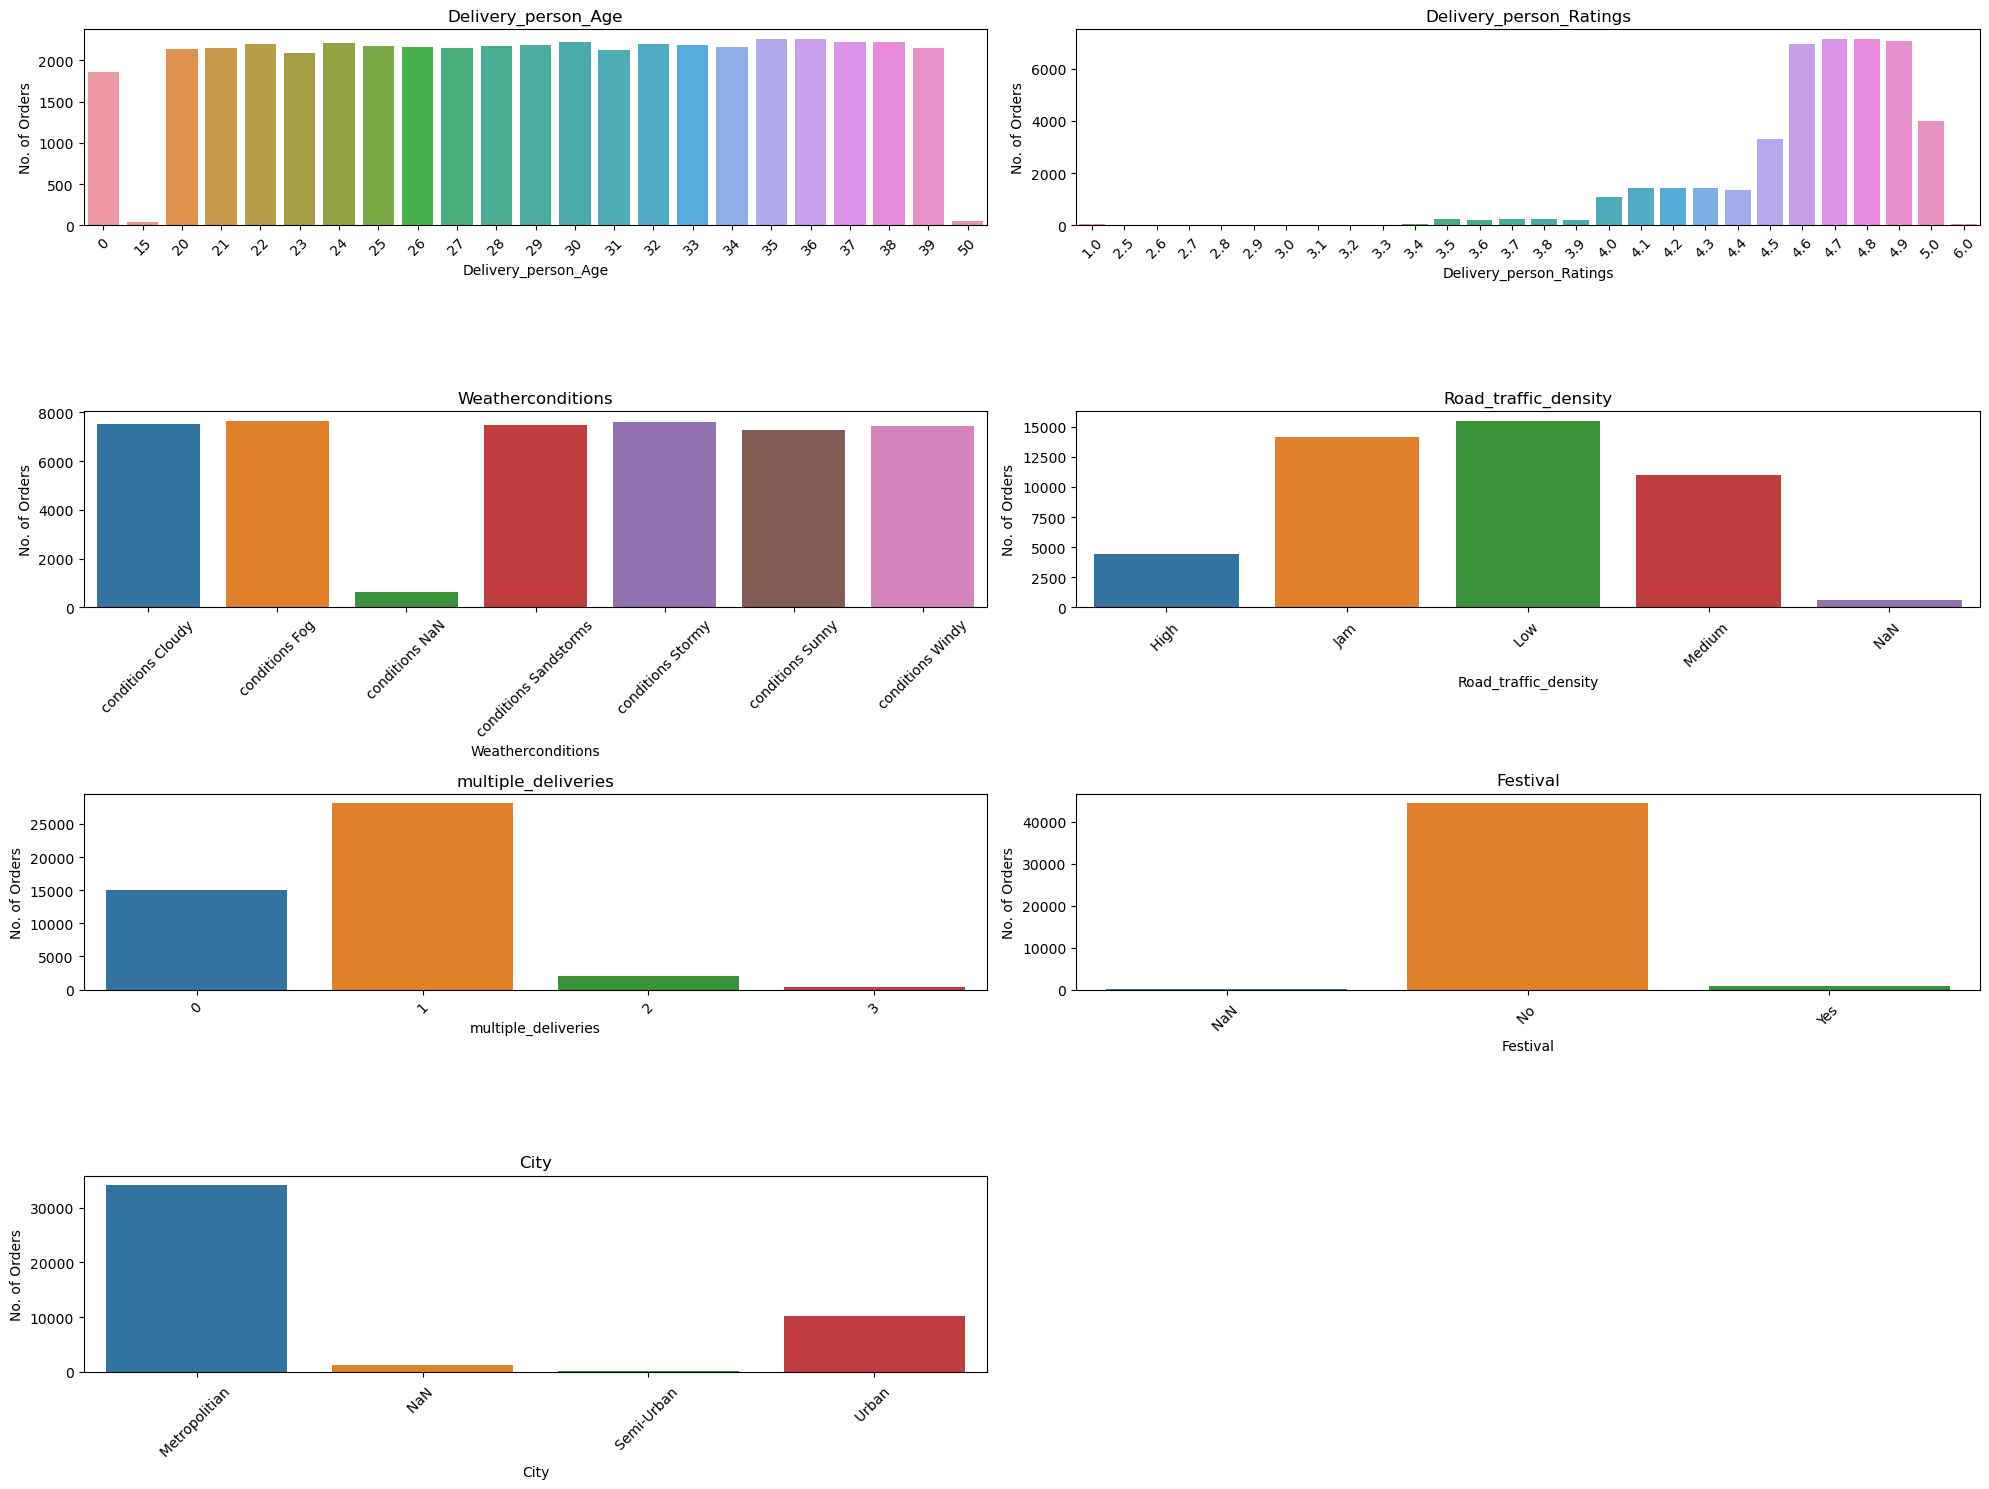

In [27]:
#Visualisating the distribution of the categorical variables:
cols = ['Delivery_person_Age','Delivery_person_Ratings','Weatherconditions','Road_traffic_density','multiple_deliveries','Festival','City']
num_plots = len(cols)
num_rows = (num_plots // 2) + (num_plots % 2)

fig, axes = plt.subplots(num_rows, 2, figsize=(20,15))

for i, column_name in enumerate(cols):
    row = i // 2
    col = i % 2

    ax = axes[row, col]
    sns.countplot(data=df.toPandas(), x=column_name, order=df.toPandas()[column_name].value_counts().sort_index().index, ax=ax)

    ax.set_xlabel(column_name)
    ax.set_ylabel('No. of Orders')
    ax.set_title(column_name)
    ax.tick_params(axis='x', rotation=45)
    
if num_plots % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

### The Delivery_person_Age column contains Age=0 values which are clearly outliers.

### Looks like we have to handle all the missing values. We can notice that although the data showed no missing values initially, it seems that the NaN values have been represented as a string, hence the isNa() function wasnt able to detect it earlier. 

### We can also bin categories as well!

In [28]:
spark = SparkSession.builder.master("local[1]").appName("SparkByExamples.com").getOrCreate()
address = [(1,"14851 Jeffrey Rd","DE"),
    (2,"Address nan ","NY"),
    (3,"13111 Siemon Ave","CA"),
    (4,"bougain nan ","WA")]
sample =spark.createDataFrame(address,["id","address","state"])
sample.show()

23/09/07 19:43:32 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+---+----------------+-----+
| id|         address|state|
+---+----------------+-----+
|  1|14851 Jeffrey Rd|   DE|
|  2|    Address nan |   NY|
|  3|13111 Siemon Ave|   CA|
|  4|    bougain nan |   WA|
+---+----------------+-----+



### <span style="background-color: #00FF00;font-size: 35px">🌼</span> trim()

To remove trailing spaces.

In [29]:
### Stripping all the white space present in categorical columns:
cat=[i for i in df.columns if df.select(i).dtypes[0][1] in ('string')]
for i in cat:
    df=df.withColumn(i,trim(df[i]))

In [30]:
## checking whether rows are trimmed:
df.show(2)

+------+------------------+-------------------+-----------------------+-------------------+--------------------+--------------------------+---------------------------+----------+-----------+-------------------+-----------------+--------------------+-----------------+-------------+---------------+-------------------+--------+-------------+---------------+
|    ID|Delivery_person_ID|Delivery_person_Age|Delivery_person_Ratings|Restaurant_latitude|Restaurant_longitude|Delivery_location_latitude|Delivery_location_longitude|Order_Date|Time_Orderd|  Time_Order_picked|Weatherconditions|Road_traffic_density|Vehicle_condition|Type_of_order|Type_of_vehicle|multiple_deliveries|Festival|         City|Time_taken(min)|
+------+------------------+-------------------+-----------------------+-------------------+--------------------+--------------------------+---------------------------+----------+-----------+-------------------+-----------------+--------------------+-----------------+-------------+-----

### <span style="background-color: #00FF00;font-size: 35px">🌼</span> regexp_replace()

To replace characters of a string.

#### Here we are replacing the "NaN" string values with "None"

In [31]:
cols = ['Delivery_person_Age','Delivery_person_Ratings','Weatherconditions','Road_traffic_density','multiple_deliveries','Festival','City']
for i in cols:
    ## Displaying the changes realtime
    ## NOTE: THE PARAMETER OF THE FUNCTION DOES NOT SUPPORT SQL-LIKE STRING MATCHING LIKE %,_,etc...
    df.withColumn(f"{i}_new",regexp_replace(i,"^(.*?)NaN","None")).select(f"{i}_new").distinct().show(5)
    ## Replacing the dataframe:
    df=df.withColumn(i,regexp_replace(i,"^(.*?)NaN","None"))

+-----------------------+
|Delivery_person_Age_new|
+-----------------------+
|                     15|
|                     29|
|                     30|
|                     34|
|                     22|
+-----------------------+
only showing top 5 rows

+---------------------------+
|Delivery_person_Ratings_new|
+---------------------------+
|                        1.0|
|                        2.6|
|                        3.1|
|                        4.2|
|                       None|
+---------------------------+
only showing top 5 rows

+---------------------+
|Weatherconditions_new|
+---------------------+
|                 None|
| conditions Sandst...|
|       conditions Fog|
|     conditions Windy|
|     conditions Sunny|
+---------------------+
only showing top 5 rows

+------------------------+
|Road_traffic_density_new|
+------------------------+
|                    High|
|                    None|
|                     Low|
|                  Medium|
|               

#### Now that we have temporarily replace the NaN values with "None", we will treat them later one-by-one in the upcoming sections.

In [32]:
df.select(df.Weatherconditions).distinct().show()

+--------------------+
|   Weatherconditions|
+--------------------+
|                None|
|conditions Sandst...|
|      conditions Fog|
|    conditions Windy|
|    conditions Sunny|
|   conditions Cloudy|
|   conditions Stormy|
+--------------------+



## <div style="color:white;display:fill;border-radius:5px;background-color:#5642C5;font-size:110%;font-family:Verdana;letter-spacing:0.5px"><p style="padding: 10px;color:white;">Feature Engineering Overview</p></div>
    
As observed from the above dataset, we can extract the following:

1. City from Delivery_person_ID ----> city  ✅

2. Bucket cities into Zones - North, South, East, West  ----> city_zone  ✅

3. Cleaning the Weatherconditions column ✅

4. Time taken to process and package the delivery using Time_Orderd and Time_Order_picked ----> processing_time

5. Time of the day - Morning, Lunch, Evening, Night, Midnight ----> day_zone

6. To clean up target variable - Time_taken(min)  ✅

7. Bucket Age - Delivery_person_Age ----> life_stage

8. Features using Latitude and Longitude ----> geosidic

9. Handle NaN values in all column

<blockquote><p style="font-size:20px; color:#159364; font-family:verdana;">1. City from delivery id:</p></blockquote>

### <span style="background-color: #00FF00;font-size: 35px">🌼</span> udf()

#### In order to apply a function into a particular column, we have create the function and register it as a UDF(User Defined Function) on Spark.

#### It is imported from the pyspark.sql.functions module.

In [33]:
# Create custom function
def city_extract(x):
    return re.findall("(\S+)RES\S+",x)[0]

# Convert the function as a UDF using the udf function:
city_extract_UDF = udf(lambda x:city_extract(x),StringType()) 

# Apply the function on the desired column:
df=df.withColumn("City_code",city_extract_UDF(df["Delivery_person_ID"]))

## Having a glance at the new column:
df.select(['Delivery_person_ID','City_code']).show(5)

+------------------+---------+
|Delivery_person_ID|City_code|
+------------------+---------+
|    INDORES13DEL02|     INDO|
|    BANGRES18DEL02|     BANG|
|    BANGRES19DEL01|     BANG|
|   COIMBRES13DEL02|    COIMB|
|    CHENRES12DEL01|     CHEN|
+------------------+---------+
only showing top 5 rows



In [34]:
## There are 22 unique city codes in our data:
df.select("City_code").distinct().show(22)

+---------+
|City_code|
+---------+
|     LUDH|
|     CHEN|
|      KOC|
|      GOA|
|     AURG|
|      JAP|
|      DEH|
|      MUM|
|      AGR|
|      SUR|
|     INDO|
|     PUNE|
|      ALH|
|      MYS|
|    COIMB|
|      HYD|
|      VAD|
|   RANCHI|
|      BHP|
|      KOL|
|      KNP|
|     BANG|
+---------+



### <span style="background-color: #F3FF00;font-size: 35px">📌</span> There are three ways by which you can apply a custom function to rows of a spark dataframe:

- User Defined Functions
- Map functions
- Custom Spark-native functions

### <span style="background-color: #00FF00;font-size: 35px">🌼</span> groupBy(), sort()--asc()/desc()

To group by the data based on column(s), To sort based on column(s) in ascending/descending fashion.

In [35]:
## To get count of the distinct cities:: (equivalent to value_counts() method in pandas)
df.groupBy("City_code").count().sort(desc("count")).show(22)  ### orderBy(desc(col("count")))  ## orderBy(desc("count")) ## orderBy('count', ascending=False) 

+---------+-----+
|City_code|count|
+---------+-----+
|      JAP| 3443|
|   RANCHI| 3229|
|     BANG| 3195|
|      SUR| 3187|
|      HYD| 3181|
|      MUM| 3173|
|      MYS| 3171|
|    COIMB| 3170|
|      VAD| 3166|
|     INDO| 3159|
|     CHEN| 3145|
|     PUNE| 3132|
|      AGR|  763|
|     LUDH|  758|
|      ALH|  740|
|      KNP|  740|
|      DEH|  737|
|      GOA|  709|
|     AURG|  703|
|      KOC|  701|
|      KOL|  700|
|      BHP|  691|
+---------+-----+



### <span style="background-color: #00FF00;font-size: 35px">🌼</span> rdd.flatMap().collect()

Methods to convert a pyspark column into a list/array:

In [36]:
df.select("City_code").distinct().rdd.flatMap(lambda x: x).collect()  ### to convert a column into a list
df.select("City_code").distinct().toPandas().values.flatten()  ### to convert a column into a numpy array

array(['LUDH', 'CHEN', 'KOC', 'GOA', 'AURG', 'JAP', 'DEH', 'MUM', 'AGR',
       'SUR', 'INDO', 'PUNE', 'ALH', 'MYS', 'COIMB', 'HYD', 'VAD',
       'RANCHI', 'BHP', 'KOL', 'KNP', 'BANG'], dtype=object)

### <span style="background-color: #00FF00;font-size: 35px">🌼</span> withColumnRenamed()

To rename a column.

In [37]:
## Renaming the column to avoid name clash:
df=df.withColumnRenamed("City_code","City_short_form")

In [38]:
## Checking to see if change has reflected:
df.columns

['ID',
 'Delivery_person_ID',
 'Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Order_Date',
 'Time_Orderd',
 'Time_Order_picked',
 'Weatherconditions',
 'Road_traffic_density',
 'Vehicle_condition',
 'Type_of_order',
 'Type_of_vehicle',
 'multiple_deliveries',
 'Festival',
 'City',
 'Time_taken(min)',
 'City_short_form']

In [39]:
### Created a manual list of the full form of the city encodings:
dic_city={"LUDH":"Ludhiana",
"CHEN":"Chennai",
"KOC":"Kochi",
"GOA":"Goa",
"AURG":"Aurangabad",
"JAP":"Jaipur",
"DEH":"Delhi",
"MUM":"Mumbai",
"AGR":"Agra",
"SUR":"Surat",
"INDO":"Indore",
"PUNE":"Pune",
"ALH":"Allahabad",
"MYS":"Mysore",
"COIMB":"Coimbatore",
"HYD":"Hyderabad",
"VAD":"Vadodara",
"RANCHI":"Ranchi",
"BHP":"Bhopal",
"KOL":"Kolkatta",
"KNP":"Kanpur",
"BANG":"Bangalore"}

NOTE: You cannot pass dictionaries as a parameter for a UDF! Hence the below code cell will raise an error:

In [40]:
## Creating a udf to map the encodings with their original names:
def city_map(x,dic):
    return dic[x['City_short_form']]
udf_city_map=udf(lambda x:city_map(x,dic),StringType())
df=df.withColumn("City",udf_city_map("City_short_form"))

## Raises Error
# df.City.show(12)

Hence you have to make a small change in the way you define the function by creating a nested function for indirectly passing the dictionary as a parameter to the UDF:

In [41]:
def get_city(mapping):
    def f(x):
        return mapping.get(x)
    return udf(f)

df=df.withColumn('City', get_city(dic_city)('City_short_form'))

In [42]:
## Checking the dataset for the new column:
df.select("City").show(5)

+----------+
|      City|
+----------+
|    Indore|
| Bangalore|
| Bangalore|
|Coimbatore|
|   Chennai|
+----------+
only showing top 5 rows



<blockquote><p style="font-size:20px; color:#159364; font-family:verdana;">2. Bucketing cities into various Zones - North, South, East, West:</p></blockquote>

In [43]:
## NOTE: THIS IS COMPLETELY BASED ON MY INTUTION. IF YOU FEEL LIKE SOMETHING IS OUT OF PLACE, PLZ CORRECT THIS IN YOUR OWN ANALYSIS:
dic_zones={"Ludhiana":"North",
"Chennai":"South",
"Kochi":"South",
"Goa":"West",
"Aurangabad":"West",
"Jaipur":"North",
"Delhi":"North",
"Mumbai":"West",
"Agra":"North",
"Surat":"East",
"Indore":"Central",
"Pune":"West",
"Allahabad":"North",
"Mysore":"South",
"Coimbatore":"South",
"Hyderabad":"South",
"Vadodara":"West",
"Ranchi":"North",
"Bhopal":"North",
"Kolkatta":"East",
"Kanpur":"North",
"Bangalore":"South"}

In [44]:
def get_zone(mapping):
    def f(x):
        return mapping.get(x)
    return udf(f)

df=df.withColumn('city_zone', get_zone(dic_zones)('City'))

In [45]:
## Checking the new columns:
df.select(["City","city_zone"]).show(5)

+----------+---------+
|      City|city_zone|
+----------+---------+
|    Indore|  Central|
| Bangalore|    South|
| Bangalore|    South|
|Coimbatore|    South|
|   Chennai|    South|
+----------+---------+
only showing top 5 rows



<blockquote><p style="font-size:20px; color:#159364; font-family:verdana;">3. Cleaning the Weatherconditions column:</p></blockquote>

In [46]:
df.select("Weatherconditions").show(5)

+--------------------+
|   Weatherconditions|
+--------------------+
|    conditions Sunny|
|   conditions Stormy|
|conditions Sandst...|
|    conditions Sunny|
|   conditions Cloudy|
+--------------------+
only showing top 5 rows



In [47]:
df.groupBy("Weatherconditions").count().sort(desc("count")).show()

+--------------------+-----+
|   Weatherconditions|count|
+--------------------+-----+
|      conditions Fog| 7654|
|   conditions Stormy| 7586|
|   conditions Cloudy| 7536|
|conditions Sandst...| 7495|
|    conditions Windy| 7422|
|    conditions Sunny| 7284|
|                None|  616|
+--------------------+-----+



Looks like there are None values as well. We will have to clean those **616** data points.

### To clean this, we will just randomly fill it with any weather as the distributions for all weather conditions are uniform.

### <span style="background-color: #00FF00;font-size: 35px">🌼</span> filter(), sample()

In order to get a sample, we use the sample() function:

#### collect() method returns a list of row objects. In order to get an attribute from a row object, we use the index of the row, followed by the \_\_getitem\_\_(<col_name>) magic method.

In [48]:
### list of unique weathers
weather=[i.__getitem__('Weatherconditions') for i in df.filter(df['Weatherconditions']!="None").select('Weatherconditions').distinct().collect()]
weather

['conditions Sandstorms',
 'conditions Fog',
 'conditions Windy',
 'conditions Sunny',
 'conditions Cloudy',
 'conditions Stormy']

In [49]:
df.select('Weatherconditions').show()

+--------------------+
|   Weatherconditions|
+--------------------+
|    conditions Sunny|
|   conditions Stormy|
|conditions Sandst...|
|    conditions Sunny|
|   conditions Cloudy|
|   conditions Cloudy|
|      conditions Fog|
|   conditions Cloudy|
|   conditions Stormy|
|      conditions Fog|
|   conditions Stormy|
|conditions Sandst...|
|conditions Sandst...|
|      conditions Fog|
|conditions Sandst...|
|    conditions Windy|
|conditions Sandst...|
|   conditions Cloudy|
|    conditions Windy|
|conditions Sandst...|
+--------------------+
only showing top 20 rows



### <span style="background-color: #00FF00;font-size: 35px">🌼</span> alias()

To create a copy of a table.

In [50]:
## creating a copy:  ### For testing.
df2=df.alias('df2')

In [51]:
### Checking the working of the sample() method:
def random_weather(x):
    ind=np.random.randint(6)
    k=weather[ind]
    return k

## Creating a udf:
udf_random_weather=udf(lambda x:random_weather(x),StringType())

In [52]:
df=df.withColumn('Weatherconditions',when(df['Weatherconditions']=="None",udf_random_weather(df['Weatherconditions'])).otherwise(df['Weatherconditions']))

In [53]:
### Now we have successfully replaced the None with random values
df.groupBy('Weatherconditions').count().orderBy(desc('count')).show()

+--------------------+-----+
|   Weatherconditions|count|
+--------------------+-----+
|      conditions Fog| 7760|
|   conditions Stormy| 7689|
|   conditions Cloudy| 7638|
|conditions Sandst...| 7587|
|    conditions Windy| 7530|
|    conditions Sunny| 7389|
+--------------------+-----+



#### Now it seems that the None values have been replaced.

<blockquote><p style="font-size:20px; color:#159364; font-family:verdana;">4. Getting Processing time:</p></blockquote>

The important variables involved in the calculation of the processing time is **Time_Orderd**, **Order_Date** and **Time_Order_picked**.

#### - Analysing the **Time_Orderd** variable:

In [54]:
## Looks like there are ~1700 rows of null values in this column.
df.groupBy('Time_Orderd').count().sort(desc("count")).show(10)
# df.groupBy('Time_Orderd').count().sort(col("count").desc()).select("Time_Orderd").show(1)  ### To view the NaN string

+-----------+-----+
|Time_Orderd|count|
+-----------+-----+
|        NaN| 1731|
|   21:55:00|  461|
|   17:55:00|  456|
|   20:00:00|  449|
|   22:20:00|  448|
|   21:35:00|  446|
|   19:50:00|  444|
|   21:15:00|  442|
|   21:20:00|  438|
|   22:45:00|  438|
+-----------+-----+
only showing top 10 rows



In [55]:
## In this dataset, as we have seen earlier, the NaNs are encoded in string, hence this will show error:
## df.filter(df["Time_Orderd"].isNaN()).select("Time_Orderd").show()

In [56]:
### Using normal string NaN in the filter function:
df.filter(df['Time_Orderd']=="NaN").select('Time_Orderd').show(5)

+-----------+
|Time_Orderd|
+-----------+
|        NaN|
|        NaN|
|        NaN|
|        NaN|
|        NaN|
+-----------+
only showing top 5 rows



In [57]:
df.filter(df['Time_Orderd']=="NaN").count()

1731

#### - Analysing the **Order_Date** variable:

In [58]:
## There no null values here:
df.groupBy('Order_Date').count().sort(desc("count")).show(10)

+----------+-----+
|Order_Date|count|
+----------+-----+
|15-03-2022| 1192|
|03-04-2022| 1178|
|13-03-2022| 1169|
|26-03-2022| 1166|
|24-03-2022| 1162|
|09-03-2022| 1159|
|05-04-2022| 1157|
|05-03-2022| 1154|
|07-03-2022| 1153|
|19-03-2022| 1150|
+----------+-----+
only showing top 10 rows



In [59]:
## No null values as below line returns error:
## df.filter(df["Order_Date"].isNaN()).select("Order_Date").show()

In [60]:
df.filter(df['Order_Date']=="NaN").count()

0

In [61]:
df.select('Order_Date').show(5)

+----------+
|Order_Date|
+----------+
|19-03-2022|
|25-03-2022|
|19-03-2022|
|05-04-2022|
|26-03-2022|
+----------+
only showing top 5 rows



#### We are combining the date and time of ordering together into a single timestamp.

### <span style="background-color: #00FF00;font-size: 35px">🌼</span> struct()

We use struct to pass multiple columns as an argument to a udf.

In [62]:
df.select(['Order_Date','Time_Orderd']).show(5)

## Creating a udf without an explicit function, and using multiple columns with the help of struct function::
order_timestamp_udf = udf(lambda x: x[0]+" "+x[1], StringType())
df=df.withColumn("order_time_timestamp",order_timestamp_udf(struct('Order_Date','Time_Orderd')))#.select("order_time_timestamp")#.show(5)

+----------+-----------+
|Order_Date|Time_Orderd|
+----------+-----------+
|19-03-2022|   11:30:00|
|25-03-2022|   19:45:00|
|19-03-2022|   08:30:00|
|05-04-2022|   18:00:00|
|26-03-2022|   13:30:00|
+----------+-----------+
only showing top 5 rows



#### -  Analysing the **Time_Order_picked** variable:

In [63]:
df.groupBy('Time_Order_picked').count().sort(desc("count")).show(10)

+-------------------+-----+
|  Time_Order_picked|count|
+-------------------+-----+
|2023-09-07 21:30:00|  496|
|2023-09-07 22:50:00|  474|
|2023-09-07 22:40:00|  458|
|2023-09-07 18:40:00|  457|
|2023-09-07 17:55:00|  456|
|2023-09-07 21:45:00|  456|
|2023-09-07 22:25:00|  455|
|2023-09-07 18:05:00|  454|
|2023-09-07 23:50:00|  453|
|2023-09-07 20:50:00|  453|
+-------------------+-----+
only showing top 10 rows



#### As you can see there are NaN values in the 'Time_Orderd' attribute. We cannot calculate processing time with NaNs in this column. How do we tackle this. ANY IDEAS?? Let me know your ideas in the comments.

### <span style="background-color: #F3FF00;font-size: 35px">📌</span>A go-to approach will be to calculate average pickup time using other non null rows and then imputing the null rows with the average obtained.

### <span style="background-color: #00FF00;font-size: 35px">🌼</span> to_timestamp()

To convert a string to timestamp

Here's the list of all the metacharacters and its corresponding meaning:

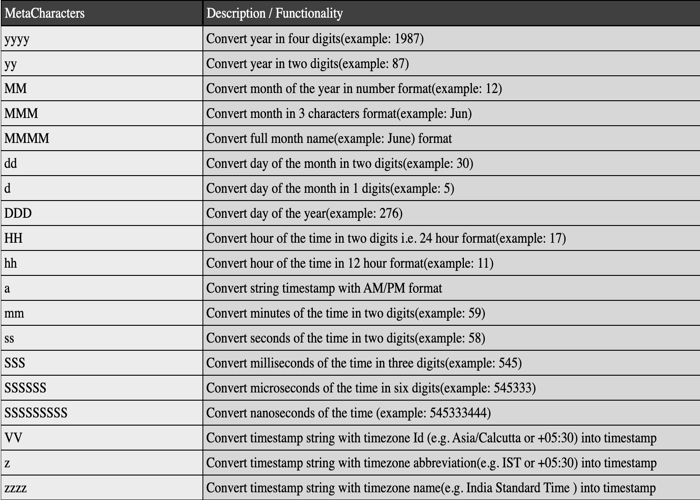

In [82]:
from PIL import Image
img=Image.open('/kaggle/input/pyspark/Metacharacters Pyspark.png')
img=img.resize((700,500))
img

As seen from the above table, we can conclude that the metacharacter format for the final order placed timestamp can be represented as:

'**dd-MM-yyyy HH:mm:ss**'

In [87]:
### Trying out the to_timestamp method:
sample=df.filter(df['Time_Orderd']!="NaN").withColumn("order_time_timestamp",order_timestamp_udf(struct('Order_Date','Time_Orderd')))\
            .select(['Order_Date','Time_Orderd','order_time_timestamp'])\
            .withColumn('order_time_timestamp',to_timestamp('order_time_timestamp','dd-MM-yyyy HH:mm:ss'))

In [89]:
sample.show(5)

+----------+-----------+--------------------+
|Order_Date|Time_Orderd|order_time_timestamp|
+----------+-----------+--------------------+
|19-03-2022|   11:30:00| 2022-03-19 11:30:00|
|25-03-2022|   19:45:00| 2022-03-25 19:45:00|
|19-03-2022|   08:30:00| 2022-03-19 08:30:00|
|05-04-2022|   18:00:00| 2022-04-05 18:00:00|
|26-03-2022|   13:30:00| 2022-03-26 13:30:00|
+----------+-----------+--------------------+
only showing top 5 rows



### <span style="background-color: #F3FF00;font-size: 35px">📌</span>NOTE: There is **to_date()** function also available which lets you convert a string date column into date format.

In [86]:
temp=df.filter(df['Time_Orderd']!="NaN").select(['Order_Date','Time_Orderd','order_time_timestamp'])\
            .withColumn('order_time_timestamp',to_timestamp('order_time_timestamp','dd-MM-yyyy HH:mm:ss'))
temp.show(5)

+----------+-----------+--------------------+
|Order_Date|Time_Orderd|order_time_timestamp|
+----------+-----------+--------------------+
|19-03-2022|   11:30:00| 2022-03-19 11:30:00|
|25-03-2022|   19:45:00| 2022-03-25 19:45:00|
|19-03-2022|   08:30:00| 2022-03-19 08:30:00|
|05-04-2022|   18:00:00| 2022-04-05 18:00:00|
|26-03-2022|   13:30:00| 2022-03-26 13:30:00|
+----------+-----------+--------------------+
only showing top 5 rows



In [90]:
### Now we have converted a string to a timestep
temp.dtypes

[('Order_Date', 'string'),
 ('Time_Orderd', 'string'),
 ('order_time_timestamp', 'timestamp')]

In [110]:
df.groupBy('order_time_timestamp').count().sort(desc("count")).show(5)

+--------------------+-----+
|order_time_timestamp|count|
+--------------------+-----+
|      01-03-2022 NaN|   59|
|      11-03-2022 NaN|   52|
|      07-03-2022 NaN|   50|
|      30-03-2022 NaN|   50|
|      17-03-2022 NaN|   49|
+--------------------+-----+
only showing top 5 rows



In [111]:
### Getting first row from the above table:
df.groupBy('order_time_timestamp').count().sort(desc("count")).collect()[:1][0].__getitem__('order_time_timestamp')

'01-03-2022 NaN'

#### - Looks like NaN has been appended along with the date. Now we will calculate the difference between all the non-NaN containing timestamps of the ordered timestamp with their corresponding delivered timestamp to get the processing time in  minutes.

#### - Then we will impute the NaN containing timestamps with the mean of the processing time.

### <span style="background-color: #00FF00;font-size: 35px">🌼</span> contains(), like()

To extract text containing a certain characters/sequence.

In [173]:
## To get the non-NaN containing timestamps:(There are two ways to do so.)
#df.filter(~df["order_time_timestamp"].like("%NaN%")).show(2)
temp=df.filter(~df["order_time_timestamp"].contains("NaN")).select(['order_time_timestamp','Time_Order_picked'])

In [174]:
temp.show(5)

+--------------------+-------------------+
|order_time_timestamp|  Time_Order_picked|
+--------------------+-------------------+
| 19-03-2022 11:30:00|2023-09-07 11:45:00|
| 25-03-2022 19:45:00|2023-09-07 19:50:00|
| 19-03-2022 08:30:00|2023-09-07 08:45:00|
| 05-04-2022 18:00:00|2023-09-07 18:10:00|
| 26-03-2022 13:30:00|2023-09-07 13:45:00|
+--------------------+-------------------+
only showing top 5 rows



### Notice the above table, the date components of both the timestamps dont match, and ideally they have to match. Hence they seem misleading. So we will use the time components alone to calculate the difference.

In [175]:
temp.dtypes

[('order_time_timestamp', 'string'), ('Time_Order_picked', 'timestamp')]

In [176]:
## Converting datatype into timestamp:
temp=temp.withColumn('order_time_timestamp',to_timestamp(temp['order_time_timestamp'],'dd-MM-yyyy HH:mm:ss'))

In [177]:
temp.show(2)

+--------------------+-------------------+
|order_time_timestamp|  Time_Order_picked|
+--------------------+-------------------+
| 2022-03-19 11:30:00|2023-09-07 11:45:00|
| 2022-03-25 19:45:00|2023-09-07 19:50:00|
+--------------------+-------------------+
only showing top 2 rows



### <span style="background-color: #00FF00;font-size: 35px">🌼</span> date_format()

To extract parts of a timestamp.

In [178]:
temp = temp.withColumn('order_time', date_format('order_time_timestamp', 'HH:mm:ss'))\
           .withColumn('Time_picked', date_format('Time_Order_picked', 'HH:mm:ss'))

In [179]:
temp.show(2)

+--------------------+-------------------+----------+-----------+
|order_time_timestamp|  Time_Order_picked|order_time|Time_picked|
+--------------------+-------------------+----------+-----------+
| 2022-03-19 11:30:00|2023-09-07 11:45:00|  11:30:00|   11:45:00|
| 2022-03-25 19:45:00|2023-09-07 19:50:00|  19:45:00|   19:50:00|
+--------------------+-------------------+----------+-----------+
only showing top 2 rows



In [180]:
temp.dtypes

[('order_time_timestamp', 'timestamp'),
 ('Time_Order_picked', 'timestamp'),
 ('order_time', 'string'),
 ('Time_picked', 'string')]

### <span style="background-color: #00FF00;font-size: 35px">🌼</span> unix_timestamp()

To convert Date and Timestamp Column to Unix Time.

In [182]:
### Calculating the difference in seconds, then dividing by 60 to get minutes
temp=temp.withColumn('order_time',to_timestamp(temp['order_time']))\
         .withColumn('Time_picked', to_timestamp(temp['Time_picked']))\
         .withColumn('processing_time',round((unix_timestamp("Time_picked") - unix_timestamp('order_time'))/60))

In [183]:
## Got the desired processing_time in minutes:
temp.show(5)

+--------------------+-------------------+-------------------+-------------------+---------------+
|order_time_timestamp|  Time_Order_picked|         order_time|        Time_picked|processing_time|
+--------------------+-------------------+-------------------+-------------------+---------------+
| 2022-03-19 11:30:00|2023-09-07 11:45:00|2023-09-07 11:30:00|2023-09-07 11:45:00|           15.0|
| 2022-03-25 19:45:00|2023-09-07 19:50:00|2023-09-07 19:45:00|2023-09-07 19:50:00|            5.0|
| 2022-03-19 08:30:00|2023-09-07 08:45:00|2023-09-07 08:30:00|2023-09-07 08:45:00|           15.0|
| 2022-04-05 18:00:00|2023-09-07 18:10:00|2023-09-07 18:00:00|2023-09-07 18:10:00|           10.0|
| 2022-03-26 13:30:00|2023-09-07 13:45:00|2023-09-07 13:30:00|2023-09-07 13:45:00|           15.0|
+--------------------+-------------------+-------------------+-------------------+---------------+
only showing top 5 rows



In [142]:
### Calculating the difference in minutes using the seconds column:
temp=temp.withColumn('processing_time_minutes',round(temp['processing_time_seconds']/60))

In [94]:
### checking for nulls in the created column:
df.filter(df['order_time_timestamp'].isNull()).select('order_time_timestamp').show(5)

+--------------------+
|order_time_timestamp|
+--------------------+
+--------------------+



### <span style="background-color: #F3FF00;font-size: 35px">📌</span>You can filter using SQL like commands as well. I will display both the techniques:

In [ ]:
## Non SQL method
df.filter(df["Time_Orderd"]!="NaN ").select(["Time_Orderd","order_time_timestamp"]).show(5)    ### The one I showed you earlier
df.filter(df["Time_Orderd"].like("%NaN%")).select(["Time_Orderd","Time_Order_picked"]).show(5)  ### similar to the SQL style of string matching

In [ ]:
df.groupBy('Time_Orderd').count().sort(col("count").desc()).select("Time_Orderd").show(1)

<blockquote><p style="font-size:20px; color:#159364; font-family:verdana;">5. Splitting the time of ordering into zones of a day - Morning, Lunch, Evening, Night, Midnight:</p></blockquote>

In [ ]:
df.columns

In [ ]:
df.select('Time_Orderd').dtypes

<blockquote><p style="font-size:20px; color:#159364; font-family:verdana;">6. Cleaning the target variable:</p></blockquote>

In [ ]:
## Before transformation:
df.select("Time_taken(min)").show(5)

In [ ]:
## Renaming the column name::
df=df.withColumnRenamed('Time_taken(min)','time_taken')

## Removing the preffix (i.e. '(min)') in the column values with the help of a UDF:
def target_clean(x):
    return x[-2:]

target_clean_udf=udf(lambda x:target_clean(x),StringType())
df=df.withColumn("time_taken",target_clean_udf(col("time_taken")))
## Converting type:
df=df.withColumn("time_taken",col("time_taken").cast(IntegerType()))

In [ ]:
## As you can see, the values have been cleaned and the type has been changed:
df.select("time_taken").show(5),df.select("time_taken").dtypes

<blockquote><p style="font-size:20px; color:#159364; font-family:verdana;">7. Handling the Geo Data:</p></blockquote>

In [ ]:
7. 

# from geopy.distance import geodesic 

# train['distance_diff_KM']=np.zeros(len(train))
# restaurant_cordinates_train=train[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
# delivery_location_cordinates_train=train[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()

# for i in range(len(train)):
#     train['distance_diff_KM'].loc[i]=geodesic(restaurant_cordinates_train[i],delivery_location_cordinates_train[i])